# Part II B:  Data Cleaning and EDA on Subreddit - SuicideWatch

This notebook follows similar approach as subreddit Depression_help to clean the data and to perform EDA.  For detailed explanation, please review the other notebook.

In [1]:
import numpy as np
import pandas as pd
import time
import re
import pickle

from wordcloud import WordCloud, STOPWORDS 

from sklearn.feature_extraction import stop_words

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords     # Import the stop word list

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading the data file

In [2]:
df = pd.read_csv('../data/suicide.csv')
df.shape

(1243, 100)

In [3]:
# Increase the number of columns in display
pd.set_option('display.max_columns', 110)

In [4]:
df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,hide_score,name,quarantine,link_flair_text_color,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,SuicideWatch,We've been seeing a worrying increase in pro-s...,t2_1t70,False,NaN,1,False,New wiki on how to avoid accidentally encourag...,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_cz6nfd,False,dark,NaN,public,1274,2,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,1274,NaN,True,NaN,1567537996.0,modmsg,[],"{'gid_1': 1, 'gid_2': 1}",NaN,True,NaN,1.567555e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'count': 1, 'is_enabled': True, 'subreddit_i...",['sorcerykid'],False,False,False,False,NaN,False,NaN,NaN,moderator,t5_2qpzs,NaN,NaN,NaN,cz6nfd,True,NaN,SQLwitch,NaN,226,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/cz6nfd/new_wiki_on_ho...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.567526e+09,0,NaN,False,NaN
1,NaN,SuicideWatch,"If you want to recognise an occasion, please d...",t2_1t70,False,NaN,0,False,Reminder: Absolutely no activism of any kind i...,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_d2370x,False,dark,NaN,public,861,1,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,861,NaN,True,NaN,1572839160.0,modmsg,[],{'gid_1': 1},NaN,True,NaN,1.568122e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,"[{'count': 1, 'is_enabled': True, 'subreddit_i...",[],False,False,False,False,NaN,False,NaN,NaN,moderator,t5_2qpzs,NaN,NaN,NaN,d2370x,True,NaN,SQLwitch,NaN,92,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/d2370x/reminder_absol...,no_ads,True,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.568093e+09,0,NaN,False,NaN
2,NaN,SuicideWatch,"Yesterday, it was a bad Surf session triggered...",t2_17cflc,False,NaN,0,False,Why does every inconvenience trigger suicidal ...,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_evaj8a,False,dark,NaN,public,204,0,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,204,NaN,False,NaN,False,modmsg,[],{},NaN,True,NaN,1.580270e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qpzs,NaN,NaN,NaN,evaj8a,True,NaN,edmvlpz,NaN,31,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/evaj8a/why_does_every...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.580241e+09,0,NaN,False,NaN
3,NaN,SuicideWatch,"I was depressed 20 years ago, OD'd and was fou...",t2_5jo7ua7l,False,NaN,0,False,"Failed 20 ye

## 2. Data Cleaning

### Drop duplicate posts

In [5]:
df.drop_duplicates(subset=['title', 'selftext'], inplace=True)
df.shape

(990, 100)

The number of posts dropped form 1243 to 990.

### Missing entry in `title` and `selftext column`

In [6]:
df.title.isnull().sum()

0

In [7]:
df.selftext.isnull().sum()

46

In [8]:
# What're the posts that don't have selftext?
df[df.selftext.isnull()][['title','selftext']]

,title,selftext
11,Slowly giving up and slowly pushing away every...,NaN
28,I know some people care. My friends ask what's...,NaN
32,Perpetually alone,NaN
58,I wish I had the courage to kill myself,NaN
61,Suicide is not selfish if you have no one to t...,NaN
69,i want to die desperately. any way how to die ...,NaN
70,Does it really get better?,NaN
79,Im so done,NaN
107,"I’m gonna end it, GCSE’s are just too fucking ...",NaN
118,I’m killing myself tomorrow,NaN


#### Fill NaN with a space

In [9]:
df['selftext'].fillna(" ", inplace=True)

In [10]:
# To confirm anymore NaN in selftext
df.selftext.isnull().sum()

0

### Look at the column information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 990
Data columns (total 100 columns):
approved_at_utc                  0 non-null float64
subreddit                        990 non-null object
selftext                         990 non-null object
author_fullname                  981 non-null object
saved                            990 non-null bool
mod_reason_title                 0 non-null float64
gilded                           990 non-null int64
clicked                          990 non-null bool
title                            990 non-null object
link_flair_richtext              990 non-null object
subreddit_name_prefixed          990 non-null object
hidden                           990 non-null bool
pwls                             940 non-null float64
link_flair_css_class             0 non-null float64
downs                            990 non-null int64
hide_score                       990 non-null bool
name                             990 non-null object
quara

Data types: bool(26), float64(30), int64(8), object(36)

### Look at the numerical columns

In [12]:
df.describe()

,approved_at_utc,mod_reason_title,gilded,pwls,link_flair_css_class,downs,author_flair_background_color,ups,total_awards_received,secure_media,category,link_flair_text,score,approved_by,thumbnail,content_categories,mod_note,created,wls,removed_by_category,banned_by,likes,suggested_sort,banned_at_utc,view_count,author_flair_text,removed_by,num_reports,mod_reason_by,removal_reason,link_flair_background_color,report_reasons,discussion_type,num_comments,subreddit_subscribers,created_utc,num_crossposts,media
count,0.0,0.0,990.000000,940.0,0.0,990.0,0.0,990.000000,990.000000,0.0,0.0,0.0,990.000000,0.0,0.0,0.0,0.0,9.900000e+02,940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,990.000000,990.000000,9.900000e+02,990.0,0.0
mean,NaN,NaN,0.002020,0.0,NaN,0.0,NaN,10.554545,0.007071,NaN,NaN,NaN,10.554545,NaN,NaN,NaN,NaN,1.580136e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.398990,179876.175758,1.580107e+09,0.0,NaN
std,NaN,NaN,0.044924,0.0,NaN,0.0,NaN,66.669571,0.095132,NaN,NaN,NaN,66.669571,NaN,NaN,NaN,NaN,5.604169e+05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.696446,0.380806,5.604169e+05,0.0,NaN
min,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.567555e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,179876.000000,1.567526e+09,0.0,NaN
25%,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,1.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.580091e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,179876.000000,1.580063e+09,0.0,NaN
50%,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,2.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1.580162e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,179876.000000,1.580133e+09,0.0,NaN
75%,NaN,NaN,0.000000,0.0,NaN,0.0,NaN,3.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,1.580232e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,179876.000000,1.580203e+09,0.0,NaN
max,NaN,NaN,1.000000,0.0,NaN,0.0,NaN,1274.000000,2.000000,NaN,NaN,NaN,1274.000000,NaN,NaN,NaN,NaN,1.580299e+09,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.000000,179877.000000,1.580271e+09,0.0,NaN


* Similar to depression_help, not many columns were used.

### When are the messages posted?

In [13]:
# Create a column of human - readable time
df['created_time'] = df['created_utc'].map(lambda x:time.ctime(x))

In [14]:
df['created_time'].min(), df['created_time'].max()

('Mon Jan 27 00:16:02 2020', 'Wed Jan 29 12:04:47 2020')

The messages were posted between Mon to Wed 27-29 Jan 2020 (singapore local time)

### Explore the potential columns that help to clean the data
#### 2.1 Remove moderator's messages

In [15]:
df.author_flair_text.astype(str).value_counts()

nan    990
Name: author_flair_text, dtype: int64

Unlink the other subreddit, moderator's status is not shown in this column

In [16]:
df.distinguished.astype(str).value_counts()

nan          988
moderator      2
Name: distinguished, dtype: int64

In [17]:
df.stickied.value_counts()

False    988
True       2
Name: stickied, dtype: int64

In [18]:
df[df.distinguished.notnull()][['title', 'selftext','author', 'author_fullname','distinguished','stickied','author_flair_text', 'author_flair_css_class']]

,title,selftext,author,author_fullname,distinguished,stickied,author_flair_text,author_flair_css_class
0,New wiki on how to avoid accidentally encourag...,We've been seeing a worrying increase in pro-s...,SQLwitch,t2_1t70,moderator,True,NaN,modmsg
1,Reminder: Absolutely no activism of any kind i...,"If you want to recognise an occasion, please d...",SQLwitch,t2_1t70,moderator,True,NaN,modmsg


In [19]:
# Remove moderator's messages
df.drop(labels=[0,1], inplace=True)
df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,hide_score,name,quarantine,link_flair_text_color,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,created_time
2,NaN,SuicideWatch,"Yesterday, it was a bad Surf session triggered...",t2_17cflc,False,NaN,0,False,Why does every inconvenience trigger suicidal ...,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_evaj8a,False,dark,NaN,public,204,0,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,204,NaN,False,NaN,False,modmsg,[],{},NaN,True,NaN,1.580270e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qpzs,NaN,NaN,NaN,evaj8a,True,NaN,edmvlpz,NaN,31,True,no_ads,False,[],False,dark,/r/SuicideWatch/comments/evaj8a/why_does_every...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.580241e+09,0,NaN,False,NaN,Wed Jan 29 03:51:58 2020
3,NaN,SuicideWatch,"I was depressed 20 years ago, OD'd and was fou...",t2_5jo7ua7l,False,NaN,0,False,"Failed 20 years ago, about to give it another try",[],r/SuicideWatch,False,0.0,NaN,0,False,t3_ev30fz,False,dark,NaN,public,387,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,387,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.580230e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qpzs,NaN,NaN,NaN,ev30fz,True,NaN,FoggyDecade,NaN,45,True,no_ads,False,[],False,NaN,/r/SuicideWatch/comments/ev30fz/failed_20_year...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.580201e+09,0,NaN,False,NaN,Tue Jan 28 16:46:59 2020
4,NaN,SuicideWatch,Loved a girl a lot but just couldn't get it ba...,t2_9rretav,False,NaN,0,False,Killing myself today,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_evcvz4,False,dark,NaN,public,30,0,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,30,NaN,False,NaN,False,NaN,[],{},NaN,True,NaN,1.580279e+09,text,0.0,NaN,NaN,text,self.SuicideWatch,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,NaN,NaN,NaN,False,False,False,False,False,[],[],False,False,False,False,NaN,False,NaN,NaN,NaN,t5_2qpzs,NaN,NaN,NaN,evcvz4,True,NaN,sinpks98,NaN,13,True,no_ads,False,[],False,NaN,/r/SuicideWatch/comments/evcvz4/killing_myself...,no_ads,False,https://www.reddit.com/r/SuicideWatch/comments...,179876,1.580251e+09,0,NaN,False,NaN,Wed Jan 29 06:29:06 2020
5,NaN,SuicideWatch,I accidentally tore my last pair of pants on t...,t2_5inepu4g,False,NaN,0,False,Thank you for reading,[],r/SuicideWatch,False,0.0,NaN,0,False,t3_evapm0,False,dark,NaN,public,32,0,{},2a7b5518-8e45-11e5-a506-0ed10b342609,False,[],NaN,False,False,NaN,{},NaN,False,32,NaN

### Post Categories:

In [20]:
df.link_flair_text.astype(str).value_counts()

nan    988
Name: link_flair_text, dtype: int64

Unlike depression_help, posts in SuicideWatch were not labelled with categories.  No filtering is required

### Crossposts
This subreddit doesn't contain crossposts either. As columns 'crosspost_parent' and 'crosspost_parent_list' are not seen in the column names

### Any video and media posts?

No.

In [21]:
df.is_video.value_counts()

False    988
Name: is_video, dtype: int64

In [22]:
df.media.astype(str).value_counts()

nan    988
Name: media, dtype: int64

### Save the cleaned data

In [23]:
df.shape

(988, 101)

In [24]:
df.to_csv('../data/suicide_cleaned.csv')

### What's the most frequently used word in the subreddit?

**This is an exploration before performing any word vectorizer**

#### Plot word cloud for selftext

In [25]:
text = " ".join(str(msg) for msg in df.selftext)
print (f"There are {len(text)} words in the combination of all {len(df.selftext)} review.")

There are 773050 words in the combination of all 988 review.


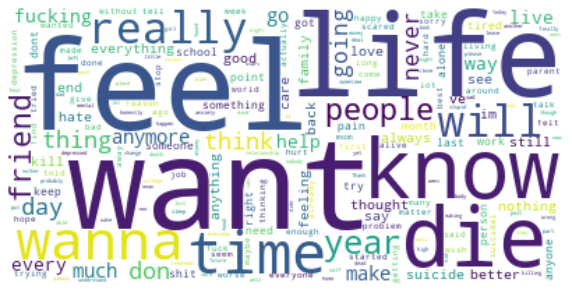

In [26]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["even", "now", 'one'])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False,background_color="white", stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/sw_selftext_wordcloud.png')

Words most mentioned in selftext: "feel", "know", "want", "life", "die"

#### Plot wordcloud for title

In [27]:
text = " ".join(str(msg) for msg in df.title)
print (f"There are {len(text)} words in the combination of all {len(df.title)} review.")

There are 40453 words in the combination of all 988 review.


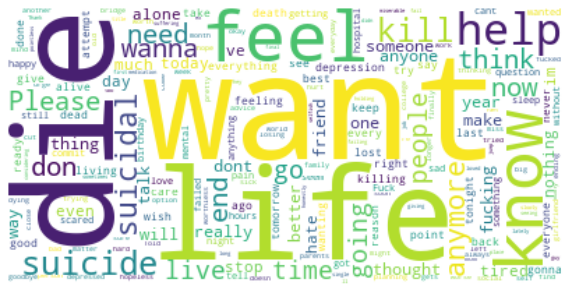

In [28]:
# Create stopword list:
#stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(collocations=False,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/sw_title_wordcloud.png')

Words most mentioned in title: "feel", "life", "want", "kill", "suicide"

## 3. Combine title and selftext into one text

In [29]:
df['comtext'] = df['title'] + " " + df['selftext']
df['comtext'].isnull().sum()

0

In [30]:
# Check if the combined text is done properly with a post
df['comtext'].loc[12]

"I want to end my life so badly. i really want to die. Suicide should be an unaliable right. It is my life, i should be able to end it if i want to. But no, people say 'dont kill yourself''its not worth it' but leave you right after. I do not matter, i really dont but of course people have to give me hope and leave me right after. I dont want to be in the hospital again but I DO NOT WANT TO LIVE i want to die, but if i try again ill be thrown in a mental institution and people will pretend to care, im sick of it. im sick of life"

In [31]:
df.loc[12]['title']

'I want to end my life so badly. i really want to die.'

In [32]:
df.loc[12]['selftext']

"Suicide should be an unaliable right. It is my life, i should be able to end it if i want to. But no, people say 'dont kill yourself''its not worth it' but leave you right after. I do not matter, i really dont but of course people have to give me hope and leave me right after. I dont want to be in the hospital again but I DO NOT WANT TO LIVE i want to die, but if i try again ill be thrown in a mental institution and people will pretend to care, im sick of it. im sick of life"

#### Plot word cloud for comtext

In [33]:
text = " ".join(str(msg) for msg in df.comtext)
print (f"There are {len(text)} words in the combination of all {len(df.comtext)} review.")

There are 813504 words in the combination of all 988 review.


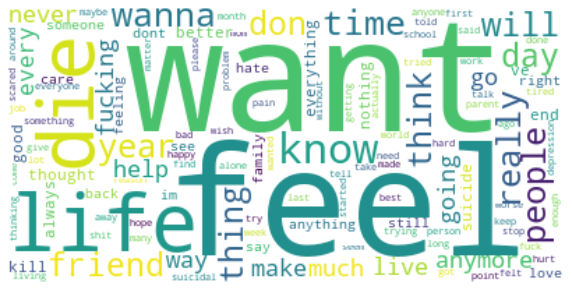

In [41]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["even", "now", 'one'])

# Generate a word cloud image
wordcloud = WordCloud(collocations=False, max_words=120, background_color="white", stopwords=stopwords).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../images/sw_combined_wordcloud.png')

Most mentioned words: "feel", "life", "want", "know", "die", "wanna"

## 4. Create a dataframe that contains only the info needed for classification

In [36]:
df_suicide = df[['subreddit','comtext']]
df_suicide

,subreddit,comtext
2,SuicideWatch,Why does every inconvenience trigger suicidal ...
3,SuicideWatch,"Failed 20 years ago, about to give it another ..."
4,SuicideWatch,Killing myself today Loved a girl a lot but ju...
5,SuicideWatch,Thank you for reading I accidentally tore my l...
6,SuicideWatch,Help for my girlfriend My girlfriend is extrem...
...,...,...
986,SuicideWatch,I wanna die but i can’t. My gf told her mom sb...
987,SuicideWatch,22 female can’t get out of bed Sorry there is ...
988,SuicideWatch,Posted this in r/Depression. Upon reflection i...
989,SuicideWatch,i fucking hate psychosis i hate my meds they’v...


### Pickle the df

In [37]:
filename = '../data/pickled_suicide.csv'
pickle.dump(df_suicide, open(filename, 'wb'))